In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import datetime

## Data Retrieval 

In [2]:
df1 = pd.read_excel('childbirth.xlsx')

In [3]:
df1.shape

(1773, 15)

In [4]:
df1.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   BabyId                              1773 non-null   object        
 1   FirsttimeParent                     1773 non-null   int64         
 2   Crying date                         1773 non-null   datetime64[ns]
 3   Crying time                         1773 non-null   object        
 4   Crying seconds                      73 non-null     float64       
 5   Feeding date                        1773 non-null   datetime64[ns]
 6   Feeding time                        1773 non-null   object        
 7   Bottle amount                       1044 non-null   float64       
 8   PumpingDate                         1773 non-null   datetime64[ns]
 9   PumpingTimePumpingLeftPumpingRight  1773 non-null   object        
 10  Pumping Left            

In [6]:
df1.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,73.000000,1044.000000,61.000000,68.000000,996.000000
mean,0.840948,1457.206746,127.203065,48.360656,38.014706,9896.331302
std,0.365828,2059.022294,36.557694,42.600091,25.394495,8834.708534
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492544
25%,1.000000,300.000000,100.000000,25.000000,20.000000,3599.739393
50%,1.000000,900.000000,120.000000,40.000000,32.500000,7701.496468
75%,1.000000,1800.000000,150.000000,55.000000,55.000000,12600.000000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


# Data Prepration

In [8]:
df1_null_per = df1.isnull().sum()/df1.shape[0]*100

In [9]:
df1_null_per

BabyId                                 0.000000
FirsttimeParent                        0.000000
Crying date                            0.000000
Crying time                            0.000000
Crying seconds                        95.882685
Feeding date                           0.000000
Feeding time                           0.000000
Bottle amount                         41.116751
PumpingDate                            0.000000
PumpingTimePumpingLeftPumpingRight     0.000000
Pumping Left                          96.559504
PumpingRight                          96.164693
SleepingDate                           0.000000
SleepingTime                           0.000000
SleepingSecond                        43.824027
dtype: float64

In [10]:
df1_drop = df1.drop(columns=['Crying seconds','Pumping Left','PumpingRight'])

In [11]:
df1_drop.shape

(1773, 12)

In [12]:
new_df1_drop_per =df1_drop.isnull().sum()/df1.shape[0]*100

In [13]:
new_df1_drop_per

BabyId                                 0.000000
FirsttimeParent                        0.000000
Crying date                            0.000000
Crying time                            0.000000
Feeding date                           0.000000
Feeding time                           0.000000
Bottle amount                         41.116751
PumpingDate                            0.000000
PumpingTimePumpingLeftPumpingRight     0.000000
SleepingDate                           0.000000
SleepingTime                           0.000000
SleepingSecond                        43.824027
dtype: float64

In [14]:
miss_vars=new_df1_drop_per[new_df1_drop_per>0].keys()

In [15]:
miss_vars

Index(['Bottle amount', 'SleepingSecond'], dtype='object')

In [16]:
for var in miss_vars:
    df1_drop[var].fillna(df1_drop[var].median(),inplace=True)

In [17]:
df1_drop.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,2015-08-05,20:31:47,5153.979043
1,HPT2_NR_16,1,2015-08-05,23:33:46,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,2015-08-05,23:33:46,33365.111960
2,HPT2_NR_16,1,2015-08-06,10:20:00,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,2015-08-06,10:20:00,2100.000000
3,HPT2_NR_16,1,2015-08-06,11:30:00,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,2015-08-06,11:30:00,1200.000000
4,HPT2_NR_16,1,2015-08-06,12:15:00,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,2015-08-06,12:15:00,4800.000000


In [18]:
df1_drop.isnull().sum()

BabyId                                0
FirsttimeParent                       0
Crying date                           0
Crying time                           0
Feeding date                          0
Feeding time                          0
Bottle amount                         0
PumpingDate                           0
PumpingTimePumpingLeftPumpingRight    0
SleepingDate                          0
SleepingTime                          0
SleepingSecond                        0
dtype: int64

## Data Visualization 

In [19]:
x = df1_drop.describe()
print(x)

       FirsttimeParent  Bottle amount  SleepingSecond
count      1773.000000    1773.000000     1773.000000
mean          0.840948     124.241399     8934.466290
std           0.365828      28.270348     6709.234599
min           0.000000      20.000000      114.492544
25%           1.000000     120.000000     6600.000000
50%           1.000000     120.000000     7701.496468
75%           1.000000     130.000000     8953.940442
max           1.000000     210.000000    45000.000000


In [20]:
x=df1_drop.corr()
print(x)

                 FirsttimeParent  Bottle amount  SleepingSecond
FirsttimeParent         1.000000      -0.079063       -0.060996
Bottle amount          -0.079063       1.000000        0.027634
SleepingSecond         -0.060996       0.027634        1.000000


In [21]:
x=df1_drop.cov()
x.style.bar(color='green',align='mid')

,FirsttimeParent,Bottle amount,SleepingSecond
FirsttimeParent,0.133830,-0.817678,-149.710335
Bottle amount,-0.817678,799.212574,5241.413542
SleepingSecond,-149.710335,5241.413542,45013828.897971


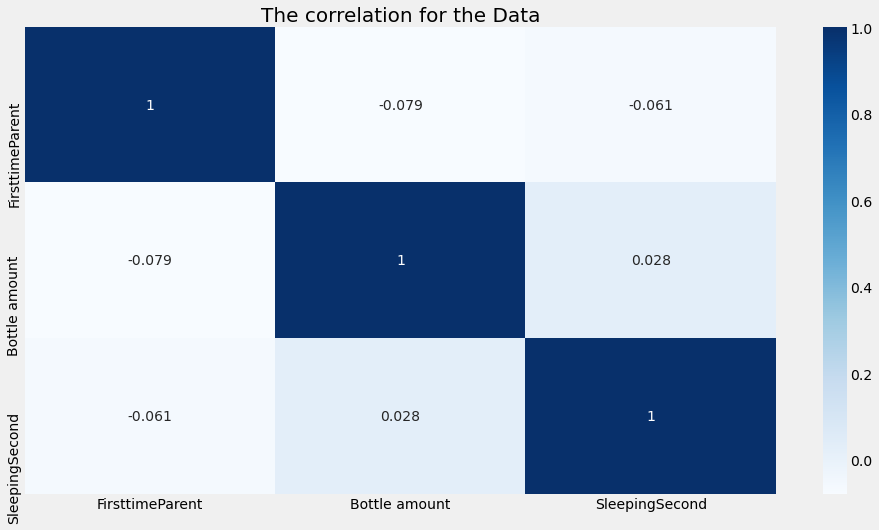

In [22]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')
sns.heatmap(df1_drop.corr(),cmap='Blues',annot=True)
plt.title('The correlation for the Data',fontsize=20)
plt.show()

## insight:- by using heat map to find the correlation we can see that,those who become first time parent are negatively corelated with bottle amount and sleeping second

## insight:- we can also visualize that bottle amount in dataset is positively corelated with the sleeping second that mean if the baby feeding have been done than the babies will sleep more as compared to less feeding

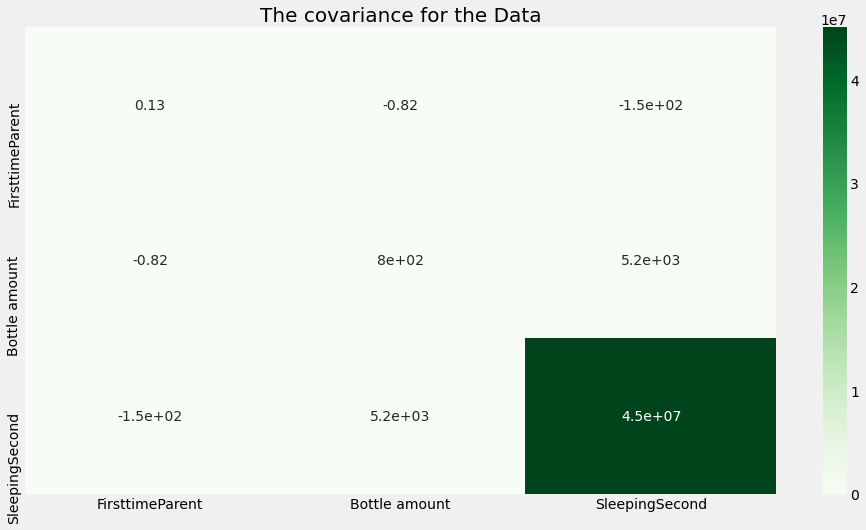

In [23]:
plt.rcParams['figure.figsize'] = (15,8)
plt.style.use('fivethirtyeight')
sns.heatmap(df1_drop.cov(),cmap='Greens',annot=True)
plt.title('The covariance for the Data',fontsize=20)
plt.show()

## insight:- from this heat map we can analyed the data and make a decision that the covariance between first time parent and sleeping second of babies are vary high. so that we can say that both the data move together in the dataset.

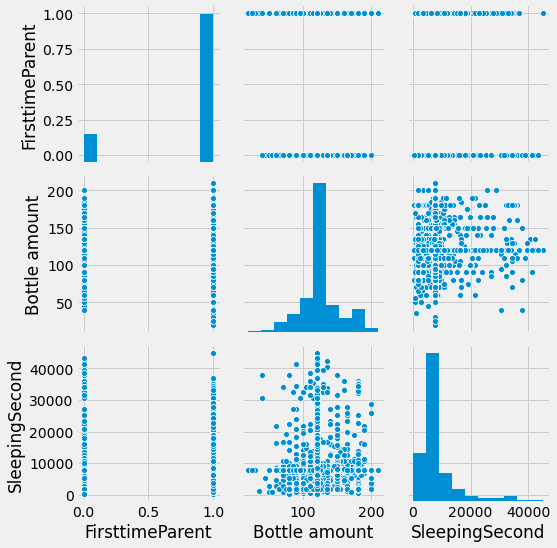

In [24]:
sns.pairplot(df1_drop)
plt.show()

## INSIGHT:-From the above pairplot we can see that  Bottle Amount does not follow a Linear relationship with Sleeping Seconds.which means if the Sleeping seconds are High than Bottle Amount will be Low.If the Child will Sleep More than he/she will Feed Less.

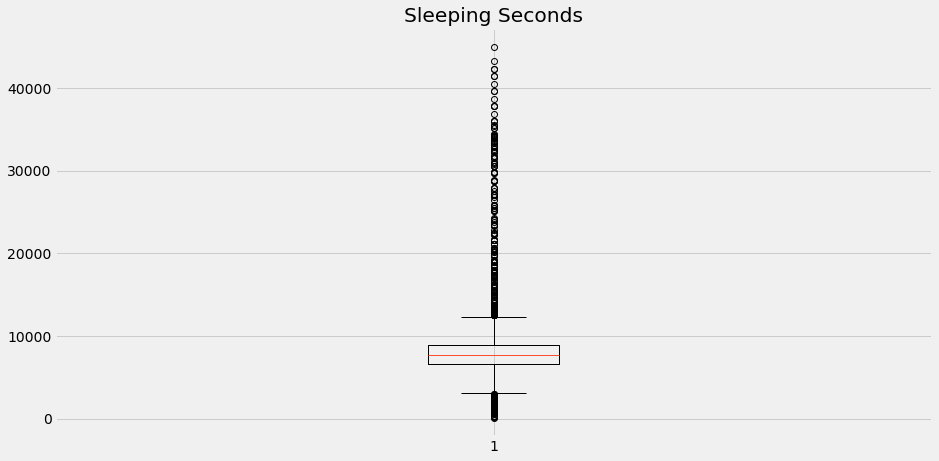

In [39]:
plt.boxplot(df1_drop['SleepingSecond']) 
plt.title('Sleeping Seconds')
plt.show()

## From the Above Boxplot we can clearly see so much Outliers.which means most of Babies Sleeps More which is not so good for Baby Health.Doctors have to Focus on that. 

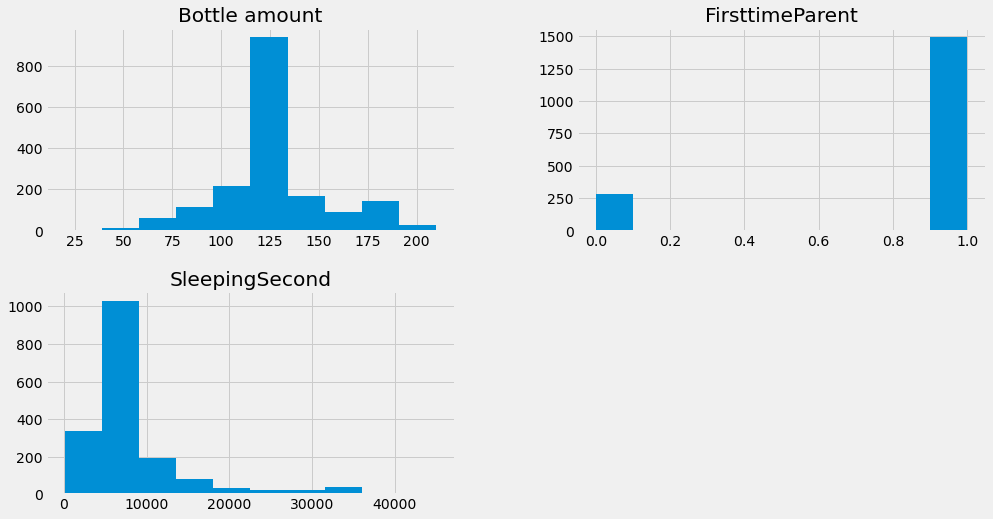

In [25]:
# create histogram for numeric data 
df1_drop.hist() 
  
# show plot 
plt.show();

## insight:- from histograms we made gave as the knowldge that the bottle amount is equally distributed throughout the graph i.e makes and gaussian distribution

## insight:- In the third histogram for sleeping second we can see that the graph is negatively skewed in the dataset that mean the sleeping time of babies are no equally distrubuted,some of them have a good sleep as compared to others

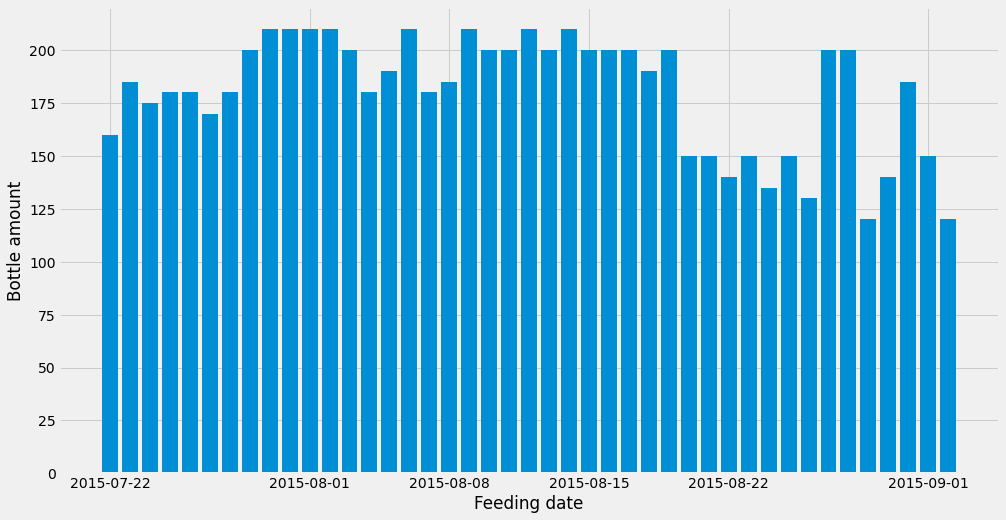

In [35]:
plt.bar(df1_drop['Feeding date'], df1_drop['Bottle amount']) 
plt.xlabel("Feeding date") 
plt.ylabel("Bottle amount") 
plt.show()

## Insight:- The above Bar graph shows that the Bottle Amount is High b/w 2015/08/01 to 2015/08/08.Which describes that Crying time and Sleeping time of Babies will be Less b/w These days as Compare to Other Days.

In [33]:
df1_drop['Date']=df1_drop['Crying date'].dt.day

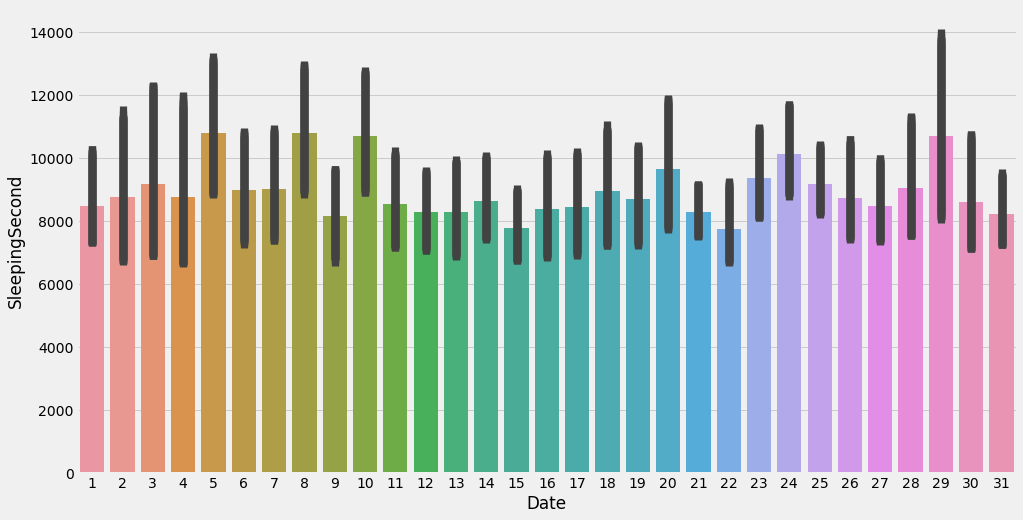

In [27]:
child_id = [child for child in df1_drop['BabyId'].unique()]
for child in child_id:
    data_final =df1_drop[df1_drop['BabyId']==child]
    
    sns.barplot(x='Date',y='SleepingSecond',data=df1_drop)

## Insight:- The above Bar graph shows that the Sleeping Second is very High on Date 2015/08/29.Which describes that Crying time and Feeding Time of Babies will be Less on Other Days as Compare to this Day. 

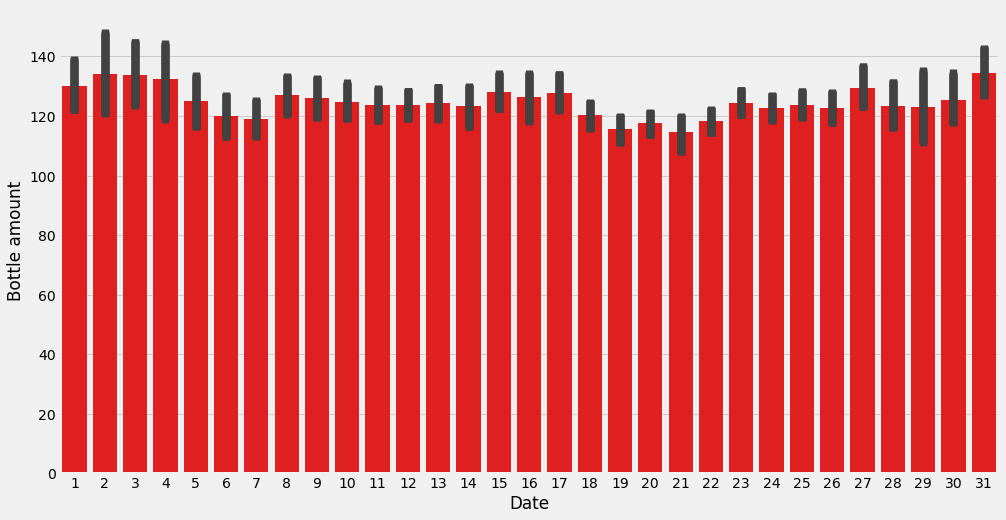

In [31]:
child_id = [child for child in df1_drop['BabyId'].unique()]
for child in child_id:
    data_final =df1_drop[df1_drop['BabyId']==child]
    
    sns.barplot(x='Date',y='Bottle amount',data=df1_drop,color = 'Red',hue_order='FirsttimeParent')

## From above Bargraph we can see that On Date 2 and 31 Highest Amount of Milk Consumed from Bottle by Babies.It means on these Days babies did not Cry more. 

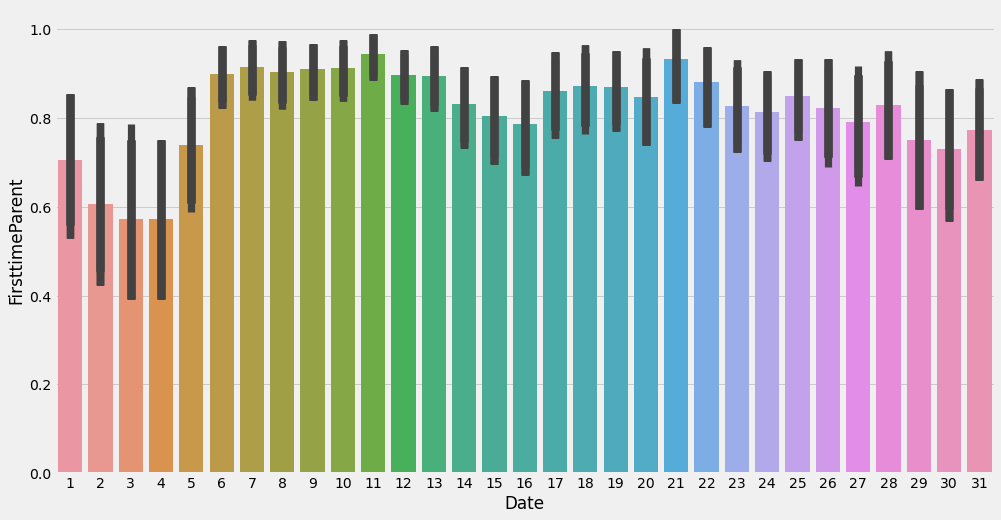

In [29]:
child_id = [child for child in df1_drop['BabyId'].unique()]
for child in child_id:
    data_final =df1_drop[df1_drop['BabyId']==child]
    
    sns.barplot(x='Date',y='FirsttimeParent',data=df1_drop)

## From Above bar Graph we Can see that FirstTime Parent is highest on Date 21 Aug 2015.Which means Most of the Baby born on that Day.Doctors worked Hard on That Day. 

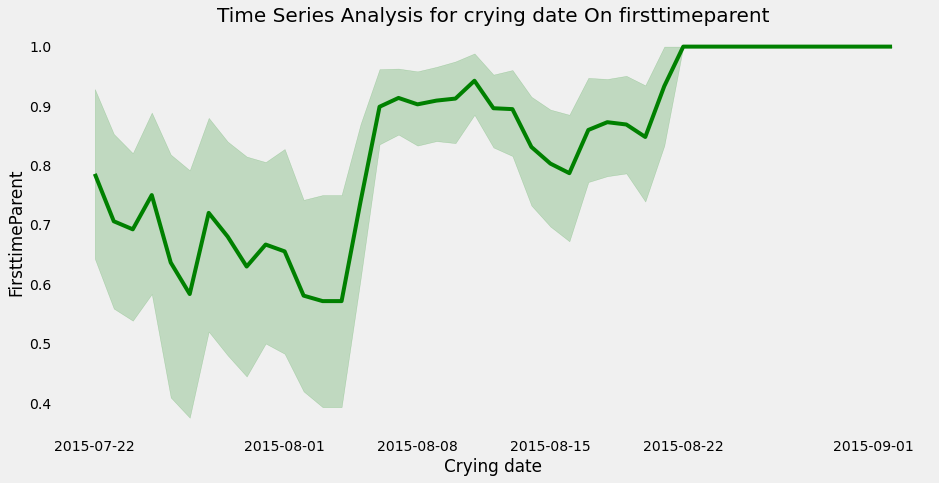

In [36]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('fivethirtyeight')

sns.lineplot(df1_drop['Crying date'],
             df1_drop['FirsttimeParent'],
             color = 'green')
plt.title('Time Series Analysis for crying date On firsttimeparent', fontsize = 20)
plt.xlabel('Crying date')
plt.grid()
plt.ylabel('FirsttimeParent')
plt.show();

## From the Above Time Series Analysis of Line Plot we can see a Linear Relationship b/w Firsttime Parents and Crying Date.Which means Who becomes First Time Parents their Baby Cry More.Because Parents Are Not Experienced.